### In this notebook we practice using TensorFlow by classifying images in the popular MNIST handwritten numbers dataset. Instructions for setting up TensorFlow in a virtual environment can be found [here](https://www.tensorflow.org/install/pip?lang=python3#package-location). In the same article there are instructions on how to get started experimenting with the MNIST dataset which we use to build our model.

In [1]:
#Import tensorflow and relevant packages
import tensorflow as tf
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

In [2]:
#load the data
mnist = tf.keras.datasets.mnist

In [3]:
#import images
(x_train, y_train),(x_test, y_test) = mnist.load_data()

### We have imported 60,000 handwritten images, it may be useful to see what they look like. 

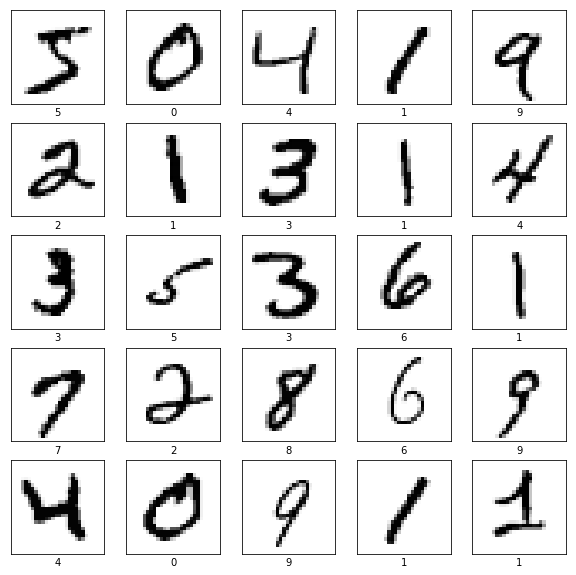

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="Greys")
    plt.xlabel(y_train[i])

In [5]:
#normalize and reshape data before we build our model
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### We build our model using a sequential model in keras. 

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(600, activation=tf.nn.relu),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### We fit the data and observe that by the final round we achieve 99% accuracy

In [12]:
model.fit(x_train, y_train, epochs=7)

Epoch 1/7
60000/60000 [==============================] - 8s 127us/step - loss: 0.2469 - acc: 0.9287
Epoch 2/7
60000/60000 [==============================] - 7s 116us/step - loss: 0.1176 - acc: 0.9657
Epoch 3/7
60000/60000 [==============================] - 7s 117us/step - loss: 0.0842 - acc: 0.9750
Epoch 4/7
60000/60000 [==============================] - 7s 124us/step - loss: 0.0646 - acc: 0.9812
Epoch 5/7
60000/60000 [==============================] - 7s 117us/step - loss: 0.0523 - acc: 0.9843
Epoch 6/7
60000/60000 [==============================] - 8s 127us/step - loss: 0.0432 - acc: 0.9874
Epoch 7/7
60000/60000 [==============================] - 7s 117us/step - loss: 0.0362 - acc: 0.9896


### When we evaluate our model on the testing data we observe that we achieved 98% accuracy. Considering the simplicity of our model this is a fantastic fit. [some](https://www.kaggle.com/cdeotte/mnist-perfect-100-using-knn) people have been able to achieve 100% accuracy on this data set, which makes it a fascinating problem to investigate

In [13]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 60us/step


[0.06022550385282375, 0.9807]